# Resource Consumption Results

This notebook contains the visualization of the resource consumption in terms time and memory used for the different search strategies (Best First Search, Threshold Based, Limited Level Width BFS) and algorithms (Path Message Patching, Path Attribution Patching, Path Message Patching with Batching over Poisitions and/or Heads) implemented in the IPE framework.
In all experiments, we have tackled the Indirect Object Identification (IOI) task using a single batch of 8 examples and zero ablation (so no counterfactual was used). The metric used was the target logit percentage, i.e., the percentage of the original target logit that is recovered after zero ablating a path, nonetheless different metrics does not particularly effect the results.
Note that the reported times and memory consumptions also include the overhead due the initial forward pass and caching of all the clean activations.

All experiments have been conducted on a machine with the following specifications:

    processor:      13th Gen Intel(R) Core(TM) i9-13900K
    RAM:            64GiB System memory
    GPU:            GeForce RTX 4090
    OS:             Ubuntu 24.04.1 LTS
    Python:         3.12.3

To also evaluate in a straightforward way the quality of the indentified paths, we report the number of paths whose exact contribution is over a certain threshold, chosen to be 0.5% of the recovered target logit.



## GPT2

### GPT2: Positional Search

In [ ]:
import pandas as pd
from IPython.display import display

filepath = "./results/gpt2/target_logit_percentage_ioi_positional_bs8.csv" # Example file, to be tested more

df = pd.read_csv(filepath)
display(df)


,type,search_strategy,top_n,paths_found,relevant_paths_found,execution_time_s,peak_process_memory_mb,threshold,max_width
0,PathMessagePatchingBatchedHeadsPos,BestFirstSearch,10.0,10,10,27.1172,2060.0,NaN,NaN
1,PathMessagePatchingBatchedHeadsPos,BestFirstSearch,100.0,100,100,90.1217,2194.0,NaN,NaN
2,PathMessagePatchingBatchedHeadsPos,BestFirstSearch,1000.0,1000,466,546.4109,2262.0,NaN,NaN
3,PathMessagePatchingBatchedHeadsPos,BestFirstSearch,10000.0,10000,692,3748.9604,2262.0,NaN,NaN
4,PathMessagePatchingBatchedHeadsPos,Threshold,NaN,4,4,4.1028,1488.0,2.000,NaN
5,PathMessagePatchingBatchedHeadsPos,Threshold,NaN,25,25,14.0073,1642.0,1.000,NaN
6,PathMessagePatchingBatchedHeadsPos,Threshold,NaN,287,287,73.9858,1888.0,0.500,NaN
7,PathMessagePatchingBatchedHeadsPos,Threshold,NaN,2093,530,405.0478,2176.0,0.250,NaN
8,PathMessagePatchingBatchedHeadsPos,Threshold,NaN,17622,792,2232.4447,2262.0,0.125,NaN
9,PathMessagePatchingBatchedHeadsPos,LimitedLevelWidth,NaN,61,6,4.6697,1806.0,NaN,10.0


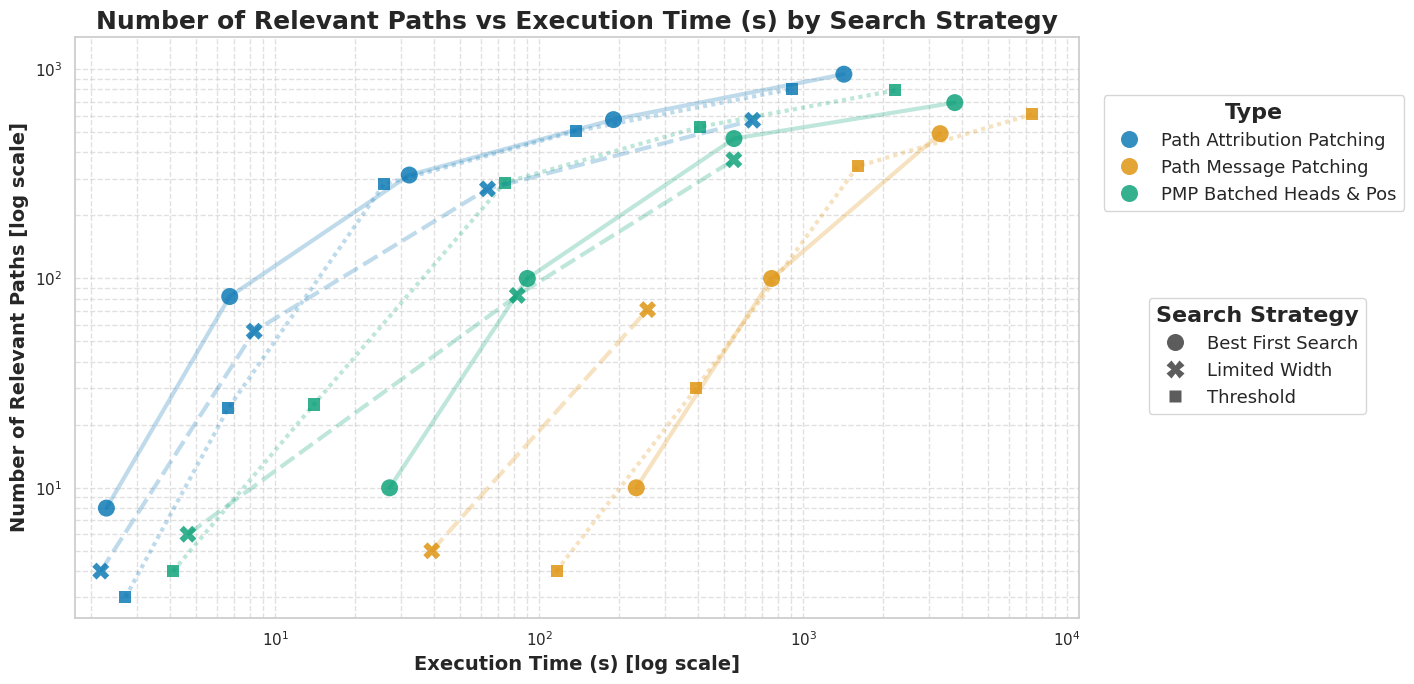

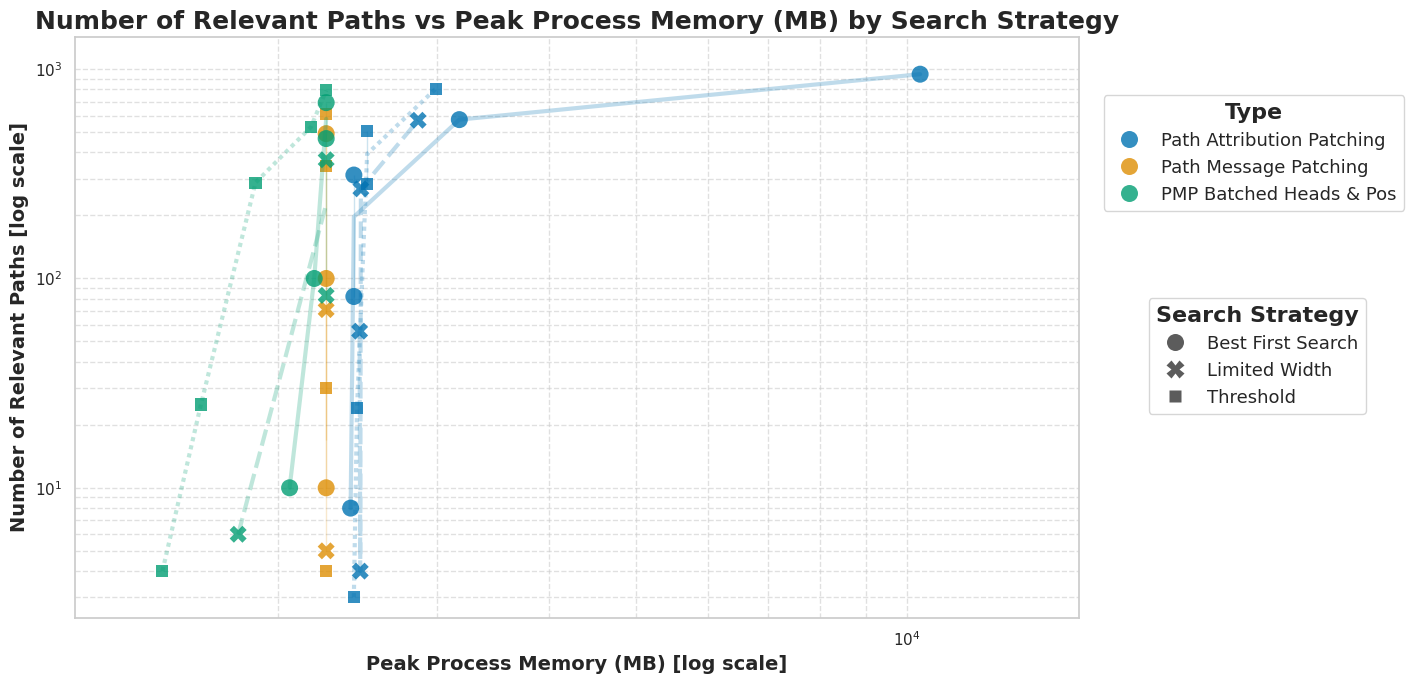

In [24]:
from plot import plot_search_strategy_results

# Example 1: Plot vs. Execution Time (default) with labels
plot_search_strategy_results(
    df.copy(),
    x_axis_col='execution_time_s',
    show_labels=False,
    save_path="plot_vs_time_with_labels.png"
)

# Example 2: Plot vs. Memory Consumption, without labels
plot_search_strategy_results(
    df.copy(),
    x_axis_col='peak_process_memory_mb',
    show_labels=False,
    save_path="plot_vs_memory_no_labels.png"
)
